In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Import the data using Pandas. 
house_price = "../Resources/housing_clean.csv"

In [3]:
# Display the resulting DataFrame to confirm the import was successful.
house_price_df = pd.read_csv(house_price, encoding="ISO-8859-1")
house_price_df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,9100000,6000,4,1,2,no,yes,no,no,2,no
1,9100000,6600,4,2,2,yes,yes,no,yes,1,yes
2,8960000,8500,3,2,4,no,no,no,yes,2,no
3,8890000,4600,3,2,2,yes,no,no,yes,2,no
4,8855000,6420,3,2,2,no,no,no,yes,1,yes


Bin data and use Classification Model

In [4]:
# Determine the number of unique values in each column
unique_values = house_price_df.nunique(axis=0)
unique_values

price              208
area               278
bedrooms             6
bathrooms            3
stories              4
guestroom            2
basement             2
hotwaterheating      2
airconditioning      2
parking              4
prefarea             2
dtype: int64

In [5]:
# Look at PRICE value counts for binning 
price_values = house_price_df.value_counts(["price"])
price_values

price  
3500000    17
4200000    17
4900000    12
5250000     9
5600000     9
           ..
3118850     1
4277000     1
5425000     1
5390000     1
3633000     1
Length: 208, dtype: int64

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

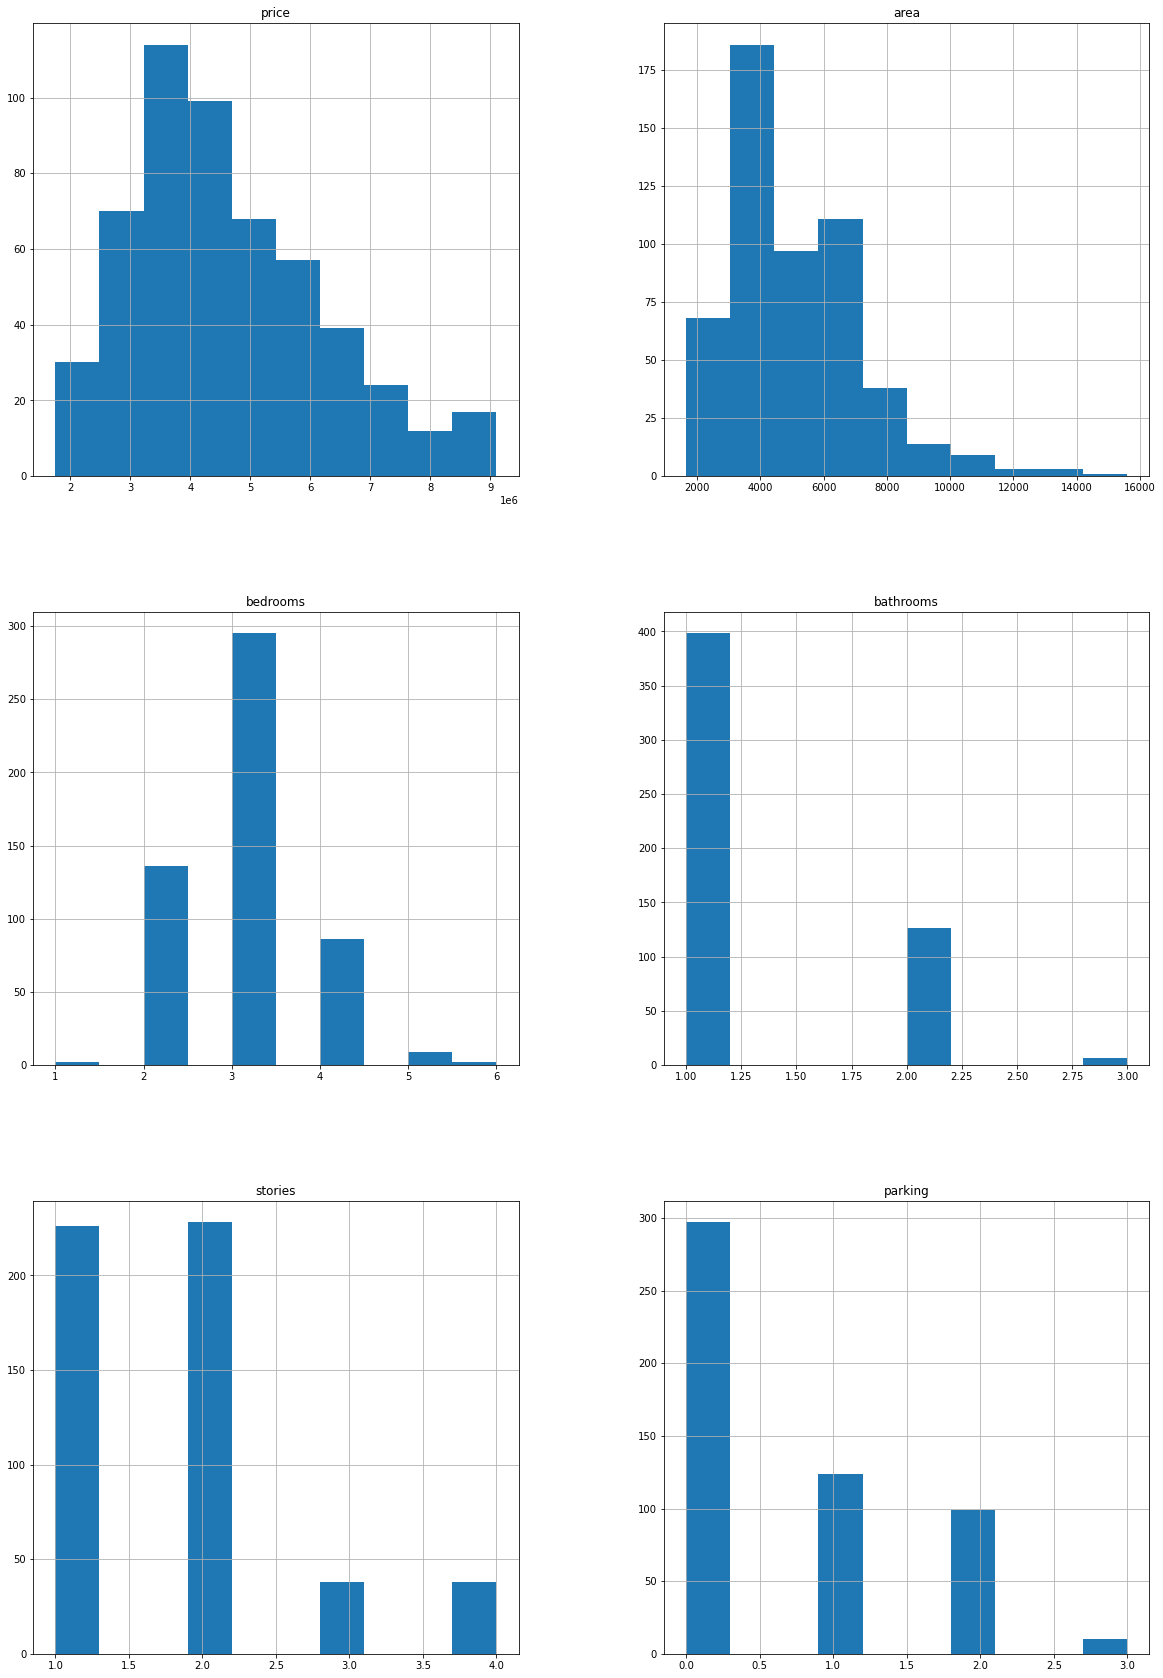

In [6]:
# Create histogram to accurately view data for binning (look at price column only)
house_price_df.hist(figsize=(20,30))

In [13]:
# Create the bins in which data will be held
bins = [0, 3000000, 5000000, 10000000]

# Create the names for the five bins
group_names = ["C", "B", "A"]


In [14]:
house_price_df["price_summary"] = pd.cut(house_price_df["price"], bins, labels=group_names, include_lowest=True)
house_price_df

,price,area,bedrooms,bathrooms,stories,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price_summary
0,9100000,6000,4,1,2,no,yes,no,no,2,no,A
1,9100000,6600,4,2,2,yes,yes,no,yes,1,yes,A
2,8960000,8500,3,2,4,no,no,no,yes,2,no,A
3,8890000,4600,3,2,2,yes,no,no,yes,2,no,A
4,8855000,6420,3,2,2,no,no,no,yes,1,yes,A
...,...,...,...,...,...,...,...,...,...,...,...,...
525,1820000,3000,2,1,1,no,yes,no,no,2,no,C
526,1767150,2400,3,1,1,no,no,no,no,0,no,C
527,1750000,3620,2,1,1,no,no,no,no,0,no,C
528,1750000,2910,3,1,1,no,no,no,no,0,no,C


In [15]:
# Check to make sure binning was successful (binning will not be even, but as long as we know that it is ok per Anthony)
house_price_df["price_summary"].value_counts()

B    279
A    180
C     71
Name: price_summary, dtype: int64

In [21]:
house_price_df.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
price_summary      category
dtype: object

If you want to use the binned data as a feature in a machine learning model, you can use it as a categorical feature or one hot encode
the data. On the other hand, if you want to aggregate the data in some way, then you would need to use the "groupby" function to 
group the data by bins.

In [28]:
# Split our preprocessed data into our features and target arrays 
# Define the X (features) and y (target) sets
y = house_price_df["price_summary"].values
X = house_price_df.drop(["price_summary"], axis=1)

x_dummies = pd.get_dummies(X)

# y = x_dummies["price_summary"].values
# X = x_dummies.drop(["price_summary"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x_dummies, y, random_state=78)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(397, 16) (133, 16) (397,) (133,)


In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Creating the RandomForestClassifier model
RFCmodel = RandomForestClassifier()

# Fit the model to the training data, and calculate the scores for the training and testing data.
RFCmodel.fit(X_train, y_train)
training_score = RFCmodel.score(X_train, y_train)
testing_score = RFCmodel.score(X_test, y_test)

In [32]:
# Print the training score and test score
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0
